# DATA PREPROCESSING FOR MACHINE LEARNING

In [1]:
# Import necessary libraries.
import pandas as pd

In [2]:
# Import the data.
data = pd.read_csv('train.csv')

In [3]:
# Get a peek at the data.
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Performing Data Cleaning and Analysis

## Understand the meaning of each column. 

    a. Passenger ID - Unique ID given to each passenger in the dataset.
    b. Survived - Passanger Survived (1) or Died(0)
    c. Name - Passenger's Name
    d. Sex - Passenger's Sex
    e. Age - Passenger's Age
    f. SibSp - Number of Siblings/Spouses aboard
    g. Parch - Number of Parent/Children aboard (Some children travelled with a nanny, therefore parch = 0 for them.)
    h. Ticket - Ticket Number
    i. Fare - Fare for the ticket.
    j. Cabin - If the passenger opted for a cabin.
    k. Embarked - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

## Analysing which columns are not useful in predicting the survival.

Note - Don't just delete the columns because you're not finding it useful. Our focus is not on deleting the columns but on analyzing how each column is affecting the result of the prediction and in accordance with that, deciding whether to keep the column or to delete the column or fill the null values of the column by some values and if yes, then what values.

In [4]:
#Understanding the details of each column. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Data in 'Name' column can never decide the survival of a person. Hence, we can safely delete it. 
del data['Name']
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Similarly for the 'Ticket', 'Fare' and 'PassengerId' column
del data['Ticket']
del data['Fare']
del data['PassengerId']
data.head() 

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S


## Managing the NULL values in the dataset. 

In [8]:
# Getting the count of NULL values in the data. 
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Cabin       687
Embarked      2
dtype: int64

We see that most of the rows in cabin column in NULL. Which implements that if a person has availed a cabin facility on the ship, his/her Cabin Number is mentioned. 

So, we will fill th NULL values with 0 and rest everything with 1. This means, 1 for a person having cabin and 0 for not. 

In [9]:
# Checking the unique values in 'Cabin' column.
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [10]:
# Since the NULL values in 'Cabin' column is represents No Cabin for the passenger, we will put 0 for them.
data['Cabin'] = data['Cabin'].fillna(0)

In [11]:
# Filling 1 for the rest of the passengers who had cabin.
for index in data.index:
    if data['Cabin'][index]!=0:
        data['Cabin'][index]=1

C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [12]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,0,S
1,1,1,female,38.0,1,0,1,C
2,1,3,female,26.0,0,0,0,S
3,1,1,female,35.0,1,0,1,S
4,0,3,male,35.0,0,0,0,S


### One hot encoding the dataset to convert string values to integers.

In [13]:
# One Hot Encoding the Sex Column.
sex_encoded = pd.get_dummies(data['Sex'] )

In [14]:
#Appending the 'Sex_Encoded' to the original data.
data['Sex'] = sex_encoded['female']
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,0,22.0,1,0,0,S
1,1,1,1,38.0,1,0,1,C
2,1,3,1,26.0,0,0,0,S
3,1,1,1,35.0,1,0,1,S
4,0,3,0,35.0,0,0,0,S


In [15]:
# Again checking the null values in the data.
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Cabin         0
Embarked      2
dtype: int64

### We want to check if 'Embarked' column is important for analysis or not, that is whether the survival of the person depends on the 'Embarked' column value or not.

In [16]:
# Finding the number of people who have survived given that they have embarked or boarded from a particular port. 
survivedQ = data[data.Embarked=='Q'][data.Survived==1].shape[0]
survivedC = data[data.Embarked=='C'][data.Survived==1].shape[0]
survivedS = data[data.Embarked=='S'][data.Survived==1].shape[0]
print(survivedQ)
print(survivedC)
print(survivedS)
print('------------')
# Finding the number of people who have survived given that they have embarked or boarded from a particular port. 
survivedQ = data[data.Embarked=='Q'][data.Survived==0].shape[0]
survivedC = data[data.Embarked=='C'][data.Survived==0].shape[0]
survivedS = data[data.Embarked=='S'][data.Survived==0].shape[0]
print(survivedQ)
print(survivedC)
print(survivedS)

30
93
217
------------
47
75
427


C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\visha\Anaconda3\lib\site-package

As there are significant changes in the survival rate based on which port the passengers aboard the ship. We cannot delete the whole embarked column(It is useful). Now the Embarked column has some null values in it and hence we can safely say that deleting some rows from total rows will not affect the result. So rather than trying to fill those null values with some vales. We can simply remove them.

In [17]:
# Checking what is the most number of unique values in this column and fillng the missing embarked values with that. 
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
# Filling the NULL values in 'Embarked' column.
data['Embarked'] = data['Embarked'].fillna('S')

In [19]:
# Encoding the character values in 'Embarked' column to Numerical Values
embarked_encoded = pd.get_dummies(data['Embarked'])

In [20]:
# Appending the encoded values of 'Embarked' column back to the dataset.
data['Cherbourg'] = embarked_encoded['C']
data['Southampton'] = embarked_encoded['S']

In [21]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Cherbourg,Southampton
0,0,3,0,22.0,1,0,0,S,0,1
1,1,1,1,38.0,1,0,1,C,1,0
2,1,3,1,26.0,0,0,0,S,0,1
3,1,1,1,35.0,1,0,1,S,0,1
4,0,3,0,35.0,0,0,0,S,0,1


In [22]:
# Deleting unnecessary 'Embarked' column.
del data['Embarked']
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Cherbourg,Southampton
0,0,3,0,22.0,1,0,0,0,1
1,1,1,1,38.0,1,0,1,1,0
2,1,3,1,26.0,0,0,0,0,1
3,1,1,1,35.0,1,0,1,0,1
4,0,3,0,35.0,0,0,0,0,1


In [23]:
data.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Cabin            0
Cherbourg        0
Southampton      0
dtype: int64

### Managing the NULL values in the Age Column

In [24]:
# Filling the null values in 'Age' column with the Mean of all the values present.
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [25]:
data.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Cherbourg,Southampton
886,0,2,0,27.000000,0,0,0,0,1
887,1,1,1,19.000000,0,0,1,0,1
888,0,3,1,29.699118,1,2,0,0,1
889,1,1,0,26.000000,0,0,1,1,0
890,0,3,0,32.000000,0,0,0,0,0


In [26]:
data.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Cabin          0
Cherbourg      0
Southampton    0
dtype: int64

### Scaling the Dataset - Explained in the Bonus Section.

## Data Visualization

In [27]:
#Drawing a pie chart for number of males and females aboard
import matplotlib.pyplot as plt
from matplotlib import style

males = (data['Sex'] == 0).sum() 
#Summing up all the values of column gender with a 
#condition for male and similary for females
females = (data['Sex'] == 1).sum()
print(males)
print(females)
p = [males, females]
plt.pie(p,    #giving array
       labels = ['Male', 'Female'], #Correspndingly giving labels
       colors = ['green', 'yellow'],   # Corresponding colors
       explode = (0.15, 0),    #How much the gap should me there between the pies
       startangle = 0)  #what start angle should be given
plt.axis('equal') 
plt.show()

577
314


In [28]:
# More Precise Pie Chart
MaleS=data[data.Sex==0][data.Survived==1].shape[0]
print(MaleS)
MaleN=data[data.Sex==0][data.Survived==0].shape[0]
print(MaleN)
FemaleS=data[data.Sex==1][data.Survived==1].shape[0]
print(FemaleS)
FemaleN=data[data.Sex==1][data.Survived==0].shape[0]
print(FemaleN)

109
468
233
81


C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


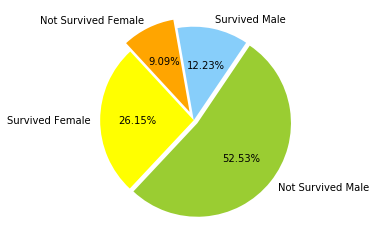

In [29]:
chart=[MaleS,MaleN,FemaleS,FemaleN]
colors=['lightskyblue','yellowgreen','Yellow','Orange']
labels=["Survived Male","Not Survived Male","Survived Female","Not Survived Female"]
explode=[0,0.05,0,0.1]
plt.pie(chart,labels=labels,colors=colors,explode=explode,startangle=100,counterclock=False,autopct="%.2f%%")
plt.axis("equal")
plt.show()

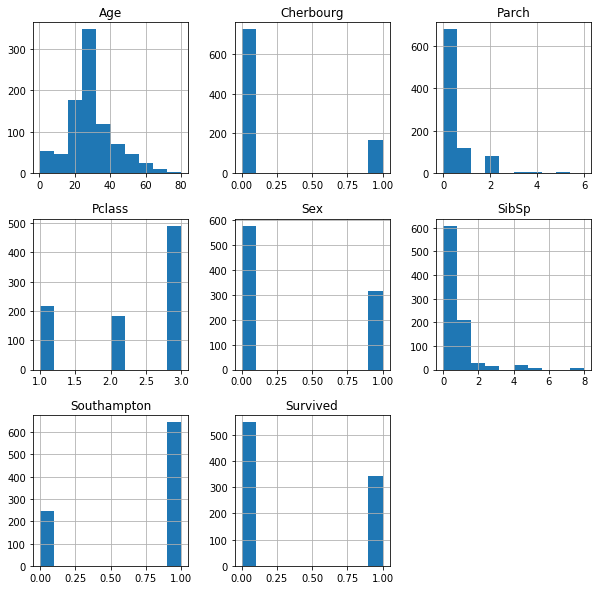

In [30]:
# histograms
data.hist(figsize=(10,10))
plt.show()

## Bonus - Applying Machine Learning Algorithms to Processed Data

In [31]:
# Importing Necessary Libraries for Machine Learning. 
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [32]:
# Split-out validation dataset
array = data.values
X = array[:,1:9]
Y = array[:,0]

In [33]:
Y=Y.astype('int')

In [34]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, 
                                                                                Y, 
                                                                                test_size=validation_size, 
                                                                                random_state=seed)

### Preprocessing - Scaling Data

In [35]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [36]:
X_train = sc_X.fit_transform(X_train)
X_validation = sc_X.transform(X_validation)

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [37]:
X_validation

array([[ 0.83861046, -0.74470474, -0.73179942, ..., -0.55571893,
        -0.48591266,  0.61848547],
       [-0.35796398, -0.74470474, -0.65400914, ..., -0.55571893,
        -0.48591266,  0.61848547],
       [ 0.83861046, -0.74470474,  0.74621581, ..., -0.55571893,
        -0.48591266,  0.61848547],
       ...,
       [ 0.83861046, -0.74470474,  0.02269761, ..., -0.55571893,
        -0.48591266,  0.61848547],
       [ 0.83861046, -0.74470474,  0.02269761, ..., -0.55571893,
        -0.48591266, -1.61685287],
       [-0.35796398,  1.34281406, -0.10947722, ..., -0.55571893,
         2.05798302, -1.61685287]])

In [38]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [39]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.803404 (0.047210)
LDA: 0.806240 (0.046520)
KNN: 0.804910 (0.047026)
CART: 0.800724 (0.063501)
NB: 0.771146 (0.045817)
SVM: 0.830184 (0.051884)


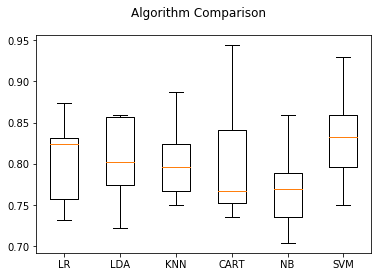

In [40]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## That's All Folks!